In [247]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

In [248]:
data=pd.read_csv('avacado.csv')
data.head()

,Sno,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [249]:
data.shape

(1517, 14)

In [250]:
data.nunique()

Sno               52
Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

In [251]:
data.describe()

,Sno,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [252]:
data.isnull().sum()

Sno             0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [253]:
data.dtypes

Sno               int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [254]:
data.drop(['Date','Sno'],axis=1,inplace=True)

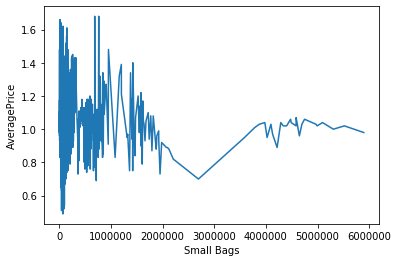

In [269]:
sns.lineplot(x='Small Bags' ,y='AveragePrice',data=data)

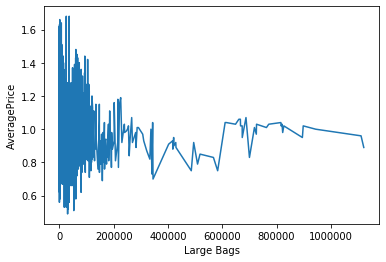

In [270]:
sns.lineplot(x='Large Bags' ,y='AveragePrice',data=data)

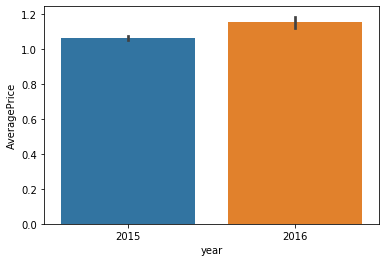

In [273]:
sns.barplot(x='year',y='AveragePrice',data=data);

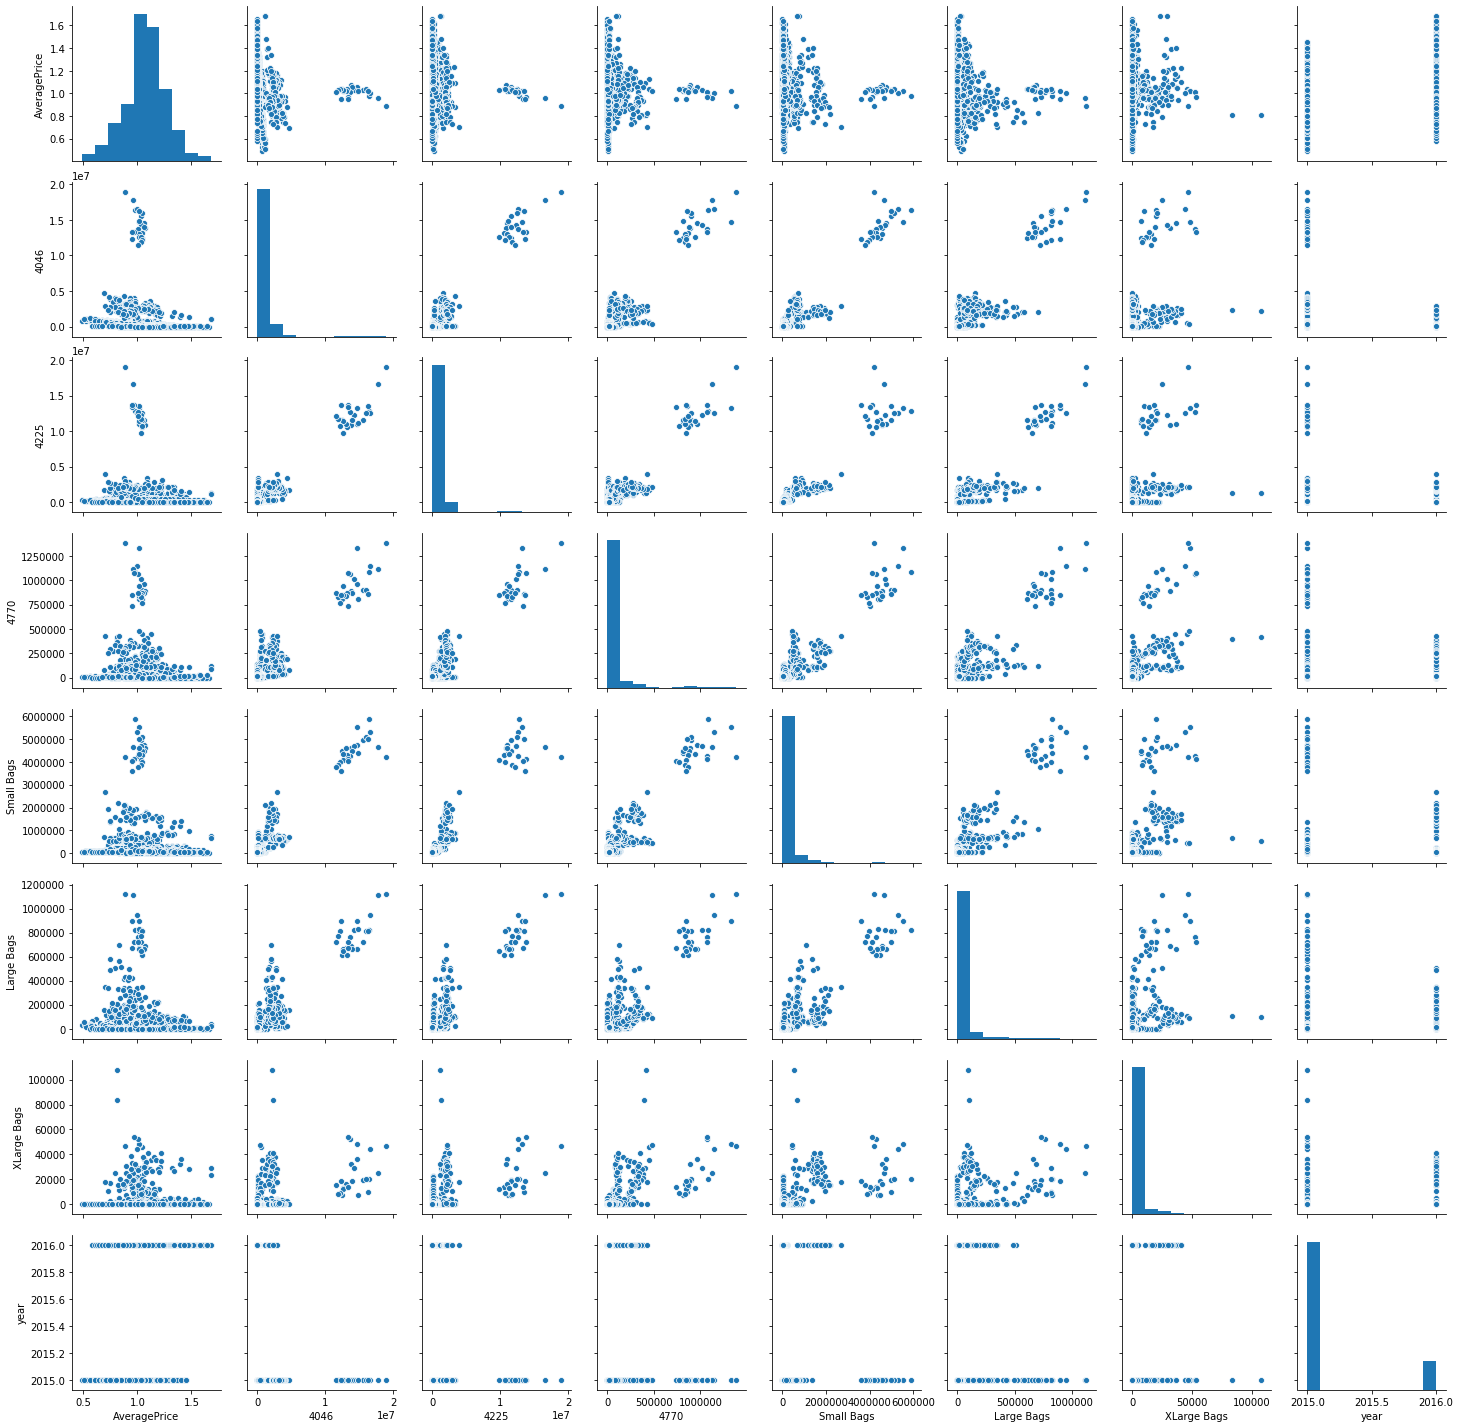

In [277]:
sns.pairplot(data);

In [255]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [256]:
data['region'].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
Roanoke                17
DallasFtWort

In [257]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


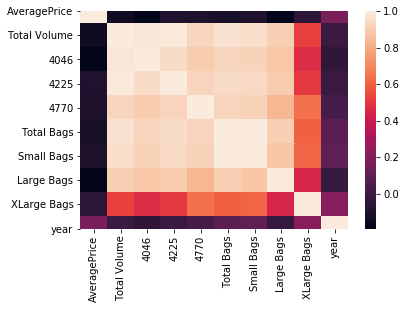

In [258]:
sns.heatmap(data.corr());

In [259]:
data.drop(['Total Volume','Total Bags','type'],axis=1,inplace=True)

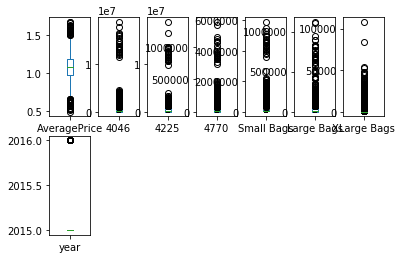

In [260]:
data.plot(kind='box',subplots=True,layout=(2,7));

In [192]:
X = data.drop(['AveragePrice'], axis = 1)
y = data['AveragePrice']

In [197]:
Xcat=pd.get_dummies(X[["region"]], drop_first = True)

In [201]:
xa=pd.concat([Xcat,X],axis=1)

In [202]:
y=np.log1p(y)

In [203]:
xa.shape,y.shape

((1517, 58), (1517,))

In [207]:
xa=xa.drop('region',axis=1)

In [208]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(xa)
x=pd.DataFrame(x,columns=xa.columns)
x

,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_Columbus,region_DallasFtWorth,...,region_TotalUS,region_West,region_WestTexNewMexico,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year
0,-0.192121,-0.211579,-0.211579,-0.206426,-0.186517,-0.229654,-0.144435,-0.124076,-0.178809,-0.106458,...,-0.129445,-0.15591,-0.134614,-0.331490,-0.333053,-0.365608,-0.371055,-0.360044,-0.292727,-0.441008
1,-0.192121,-0.211579,-0.211579,-0.206426,-0.186517,-0.229654,-0.144435,-0.124076,-0.178809,-0.106458,...,-0.129445,-0.15591,-0.134614,-0.331676,-0.338923,-0.365534,-0.369812,-0.360008,-0.292727,-0.441008
2,-0.192121,-0.211579,-0.211579,-0.206426,-0.186517,-0.229654,-0.144435,-0.124076,-0.178809,-0.106458,...,-0.129445,-0.15591,-0.134614,-0.331614,-0.300348,-0.365010,-0.371922,-0.359960,-0.292727,-0.441008
3,-0.192121,-0.211579,-0.211579,-0.206426,-0.186517,-0.229654,-0.144435,-0.124076,-0.178809,-0.106458,...,-0.129445,-0.15591,-0.134614,-0.331441,-0.322576,-0.365431,-0.375576,-0.359701,-0.292727,-0.441008
4,-0.192121,-0.211579,-0.211579,-0.206426,-0.186517,-0.229654,-0.144435,-0.124076,-0.178809,-0.106458,...,-0.129445,-0.15591,-0.134614,-0.331539,-0.339401,-0.365408,-0.375098,-0.359160,-0.292727,-0.441008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-0.192121,-0.211579,-0.211579,-0.206426,-0.186517,-0.229654,6.923546,-0.124076,-0.178809,-0.106458,...,-0.129445,-0.15591,-0.134614,-0.302475,-0.331910,-0.238672,-0.308916,-0.273213,-0.260489,2.267532
1513,-0.192121,-0.211579,-0.211579,-0.206426,-0.186517,-0.229654,6.923546,-0.124076,-0.178809,-0.106458,...,-0.129445,-0.15591,-0.134614,-0.309770,-0.334407,-0.224966,-0.299831,-0.288090,-0.292727,2.267532
1514,-0.192121,-0.211579,-0.211579,-0.206426,-0.186517,-0.229654,6.923546,-0.124076,-0.178809,-0.106458,...,-0.129445,-0.15591,-0.134614,-0.308209,-0.333987,-0.244443,-0.301950,-0.290953,-0.182037,2.267532
1515,-0.192121,-0.211579,-0.211579,-0.206426,-0.186517,-0.229654,6.923546,-0.124076,-0.178809,-0.106458,...,-0.129445,-0.15591,-0.134614,-0.304230,-0.333568,-0.238936,-0.298364,-0.290783,-0.292727,2.267532


In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [211]:
lr=LinearRegression()
sv=SVR()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
xgb=XGBRegressor()
ad=AdaBoostRegressor()

In [212]:
model_list=[]
model_list.append(('LinearRegression',lr))
model_list.append(('SVR',sv))
model_list.append(('Kneighbors',knn))
model_list.append(('DecisionTreeRegressor',dt))
model_list.append(('RandomForestRegressor',rf))
model_list.append(('GradientBoostingRegressor',gb))
model_list.append(('XGBoostRegressor',xgb))
model_list.append(('AdBoostingRegressor',ad))

In [213]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=121,test_size=.20)


In [214]:
Model=[]
R2_score=[]
CS=[]
MSE=[]
MAE=[]
for name,model in model_list:
    print('**********************',name,'************************')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    RS=r2_score(pred,y_test)
    print('r2_score is ',RS)
    R2_score.append(RS*100)
    print('\n')
    cs=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('cross_val is ',cs)
    CS.append(cs*100)
    print('\n')
    mse=mean_squared_error(y_test,pred)
    print('mean square error is',mse)
    MSE.append(mse)
    print('\n')
    mae=mean_absolute_error(y_test,pred)
    print('mean absolute error is',mae)
    MAE.append(mae)
    
    
    

********************** LinearRegression ************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2_score is  0.5997326452862921


cross_val is  -2.8714632440656167e+26


mean square error is 0.000826582865009132


mean absolute error is 0.021895070656537775
********************** SVR ************************
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


r2_score is  -2.4799546744418905


cross_val is  -0.38163046235613873


mean square error is 0.002171371579682348


mean absolute error is 0.03827645179505912
********************** Kneighbors ************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


r2_score is  0.8300487592622023


cross_val is  -0.7258656819472596




In [215]:
best_model=pd.DataFrame({'Model': Model,'R2_score':R2_score,'CV_Score':CS,'MSE':mse,'MAE': mae})
best_model

,Model,R2_score,CV_Score,MSE,MAE
0,LinearRegression,59.973265,-2.871463e+28,0.001264,0.028578
1,SVR,-247.995467,-3.816305e+01,0.001264,0.028578
2,Kneighbors,83.004876,-7.258657e+01,0.001264,0.028578
3,DecisionTreeRegressor,70.420528,-2.874456e+01,0.001264,0.028578
4,RandomForestRegressor,80.807637,-6.173228e+00,0.001264,0.028578
5,GradientBoostingRegressor,57.487704,3.306119e+00,0.001264,0.028578
6,XGBoostRegressor,56.288018,1.250005e+01,0.001264,0.028578
7,AdBoostingRegressor,-7.069936,-1.362293e+00,0.001264,0.028578


In [278]:
from sklearn.externals import joblib
joblib.dump(rf,'AvacadoRegression_joblib')

['AvacadoRegression_joblib']